In [3]:
# import dependencies
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import scipy.stats as st
import scipy.stats as sem
from scipy.stats import linregress
# from noaa_api_v2 import NOAAData
import datetime

# file to load
wildland_fire_locations_full_history = "Wildland_Fire_Locations_Full_History.csv"
fire_acres = "fire-acres.csv"

# read purchase_data.csv file and store in dataframe
wildland_fire_locations_full_history_read = pd.read_csv(wildland_fire_locations_full_history, low_memory=False)
fire_acres = pd.read_csv(fire_acres)

# wildland_fire_locations_full_history_read
fire_acres

,Year,Fires,Acres
0,2020,58950,10122336
1,2019,50477,4664364
2,2018,58083,8767492
3,2017,71499,10026086
4,2016,67743,5509995
5,2015,68151,10125149
6,2014,63312,3595613
7,2013,47579,4319546
8,2012,67774,9326238
9,2011,74126,8711367


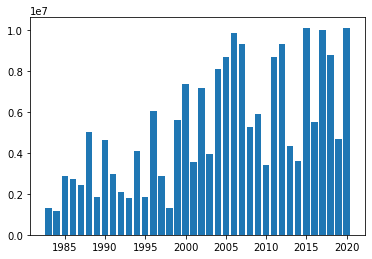

In [3]:
plt.bar(fire_acres['Year'], fire_acres['Acres'])
plt.show()

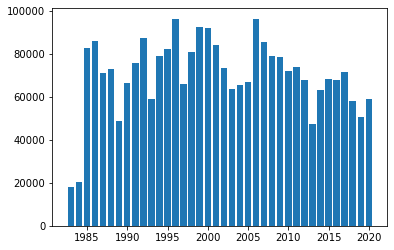

In [2]:
plt.bar(fire_acres['Year'], fire_acres['Fires'])
plt.show()

In [4]:
wildland_fire_locations_full_history_df = pd.DataFrame(wildland_fire_locations_full_history_read)
# subset_list = ['OBJECTID','X', 'Y','UniqueFireIdentifier','DailyAcres','FireDiscoveryDateTime','CreatedOnDateTime_dt','ModifiedOnDateTime_dt']
subset_list = ['OBJECTID','UniqueFireIdentifier','X', 'Y','POOState','DailyAcres','FireCause', 'FireDiscoveryDateTime', 'FireOutDateTime']
cleaned_wildland_fire_locations_full_history_df = wildland_fire_locations_full_history_df[subset_list]
cleaned_wildland_fire_locations_full_history_df = cleaned_wildland_fire_locations_full_history_df.dropna(how='any')
cleaned_wildland_fire_locations_full_history_df 

,OBJECTID,UniqueFireIdentifier,X,Y,POOState,DailyAcres,FireCause,FireDiscoveryDateTime,FireOutDateTime
0,1,2020-MTLG42-000224,-104.457511,45.785037,US-MT,50.6,Human,2020/08/06 18:58:00+00,2020/08/12 14:00:00+00
2,3,2017-MTNWS-000878,-114.835414,48.073946,US-MT,50.0,Human,2017/10/17 20:20:24+00,2017/11/09 21:59:59+00
5,6,2020-MSMNF-000308,-89.069725,31.068196,US-MS,1.0,Human,2020/11/23 19:17:00+00,2020/11/30 14:29:59+00
6,7,2019-UTUWF-000883,-111.414812,40.072836,US-UT,170.0,Unknown,2019/10/26 21:29:00+00,2019/11/13 00:14:59+00
7,8,2020-MTCES-006641,-111.575112,44.637596,US-MT,0.1,Natural,2020/08/27 14:06:38+00,2020/08/27 20:52:59+00
...,...,...,...,...,...,...,...,...,...
174713,195220,2021-MEMES-21002354,-69.798737,44.734872,US-ME,0.1,Human,2021/04/13 18:00:00+00,2021/04/13 18:59:59+00
174714,195221,2021-MEMES-21002346,-69.670228,44.278842,US-ME,0.9,Human,2021/04/13 16:01:00+00,2021/04/13 17:28:00+00
174717,195224,2021-MEMES-21002343,-70.636104,43.177407,US-ME,0.1,Human,2021/04/13 15:20:00+00,2021/04/13 15:49:59+00
174736,195243,2021-MEMES-21002360,-69.804655,45.653044,US-ME,0.3,Human,2021/04/13 20:00:00+00,2021/04/13 21:57:00+00


In [42]:
# print(cleaned_wildland_fire_locations_full_history_df[['X', 'Y']].max())
# print(cleaned_wildland_fire_locations_full_history_df[['X', 'Y']].min())

# the '[0]' at the end of this dataframe call is just to pull the first element from that column for testing purposes we could set it with a variable
# replace 'cleaned_wildland_fire_locations_full_history_df' with your dataframe's name
date_list = list(cleaned_wildland_fire_locations_full_history_df['FireDiscoveryDateTime'][0])
# define the 'date_conversion' function
def date_conversion(date_list):
    date_df = []
    for element in range(4):
        date_df.append(date_list[element])
        element_list = date_df
        element_list_string = ""
        for n in sentence:
            element_list_string += str(n)
        year = int(element_list_string)
        element_list_string = []
    date_df = []
    for element in range(5, 7):
        date_df.append(date_list[element])
        element_list = date_df
        element_list_string = ""
        for n in sentence:
            element_list_string += str(n)
        year = int(element_list_string)
        element_list_string = []
    date_df = []
    for element in range(8, 10):
        date_df.append(date_list[element])
        element_list = date_df
        element_list_string = ""
        for n in sentence:
            element_list_string += str(n)
        year = int(element_list_string)
        element_list_string = []        
    return(year, month, day)
# evaluate 'date_conversion()' function for a given 'date_list'
date_conversion(date_list)
# print function output
print(f"{year} {month} {day}")

print(cleaned_wildland_fire_locations_full_history_df['FireDiscoveryDateTime'][0].split()[0].split('/'))

2020 8 6
['2020', '08', '06']


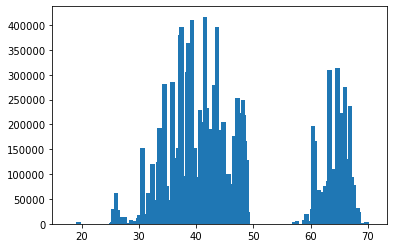

In [8]:
plt.bar(cleaned_wildland_fire_locations_full_history_df['Y'], cleaned_wildland_fire_locations_full_history_df['DailyAcres'])
plt.show()

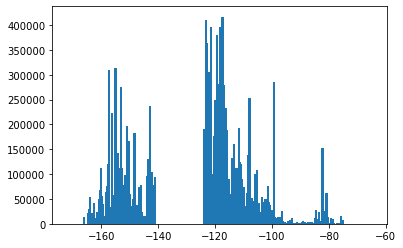

In [10]:
plt.bar(cleaned_wildland_fire_locations_full_history_df['X'], cleaned_wildland_fire_locations_full_history_df['DailyAcres'])
plt.show()

In [ ]:
# NOAA api
base_url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/"
stations_url = 'https://www.ncdc.noaa.gov/cdo-web/api/v2/stations'
datasets_url = 'https://www.ncdc.noaa.gov/cdo-web/api/v2/datasets'
api_key = "OHBbUjCUDvEnbWvdlIOdkdYRklcEJviw"

In [16]:
# NOAA API V2
# Documentation can be found at
# http://www.ncdc.noaa.gov/cdo-web/webservices/v2
# CITATION https://github.com/crvaden/NOAA_API_v2 (accessed 19th of April 2021)
import requests


class NOAAData(object):
    def __init__(self, token):
        # NOAA API Endpoint
        self.url = 'https://www.ncdc.noaa.gov/cdo-web/api/v2/'
        self.h = dict(token=token)

    def poll_api(self, req_type, payload):
        # Initiate http request - kwargs are constructed into a dict and passed as optional parameters
        # Ex (limit=100, sortorder='desc', startdate='1970-10-03', etc)
        r = requests.get(self.url + req_type, headers=self.h, params=payload)

        if r.status_code != 200:  # Handle erroneous requests
            print("Error: " + str(r.status_code))
        else:
            r = r.json()
            try:
                return r['results']  # Most JSON results are nested under 'results' key
            except KeyError:
                return r  # for non-nested results, return the entire JSON string

    # Fetch available datasets
    # http://www.ncdc.noaa.gov/cdo-web/webservices/v2#datasets
    def datasets(self, **kwargs):
        req_type = 'datasets'
        return self.poll_api(req_type, kwargs)

    # Fetch data categories
    # http://www.ncdc.noaa.gov/cdo-web/webservices/v2#dataCategories
    def data_categories(self, **kwargs):
        req_type = 'datacategories'
        return self.poll_api(req_type, kwargs)

    # Fetch data types
    # http://www.ncdc.noaa.gov/cdo-web/webservices/v2#dataTypes
    def data_types(self, **kwargs):
        req_type = 'datatypes'
        return self.poll_api(req_type, kwargs)

    # Fetch available location categories
    # http://www.ncdc.noaa.gov/cdo-web/webservices/v2#locationCategories
    def location_categories(self, **kwargs):
        req_type = 'locationcategories'
        return self.poll_api(req_type, kwargs)

    # Fetch all available locations
    # http://www.ncdc.noaa.gov/cdo-web/webservices/v2#locations
    def locations(self, **kwargs):
        req_type = 'locations'
        return self.poll_api(req_type, kwargs)

    # Fetch All available stations
    # http://www.ncdc.noaa.gov/cdo-web/webservices/v2#stations
    def stations(self, h, p, **kwargs):
        req_type = 'stations'
        return self.poll_api(req_type, kwargs)

    # Fetch information about specific dataset
    def dataset_spec(self, set_code, **kwargs):
        req_type = 'datacategories/' + set_code
        return self.poll_api(req_type, kwargs)

    # Fetch data
    # http://www.ncdc.noaa.gov/cdo-web/webservices/v2#data
    def fetch_data(self, **kwargs):
        req_type = 'data'
        return self.poll_api(req_type, kwargs)
